In [1]:

import tensorflow as tf 
import numpy as np 
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


In [2]:
(x_train_balanced, y_train_balanced), (x_test_balanced, y_test_balanced) = tf.keras.datasets.mnist.load_data()

Text(0.5, 1.0, 'Number of digit classes')

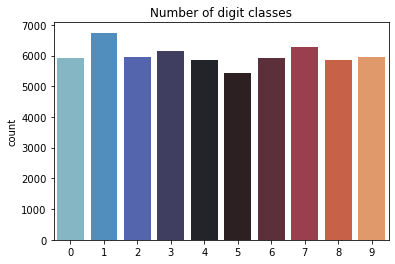

In [3]:
plt.plot(figure = (16,10))
g = sns.countplot(x=y_train_balanced, palette = 'icefire')
plt.title('Number of digit classes')


## Unblanced : 

In [4]:
def check_class_distribution(y_train):
    class_frq = {}
    for val in y_train:
        if class_frq.get(val) is not None:
            class_frq[val] = class_frq.get(val) +1
        else:
            class_frq[val] = 1
    class_frq
    
    return class_frq

In [5]:
print("Class Distribution: ", check_class_distribution(y_train_balanced))


Class Distribution:  {5: 5421, 0: 5923, 4: 5842, 1: 6742, 9: 5949, 2: 5958, 3: 6131, 6: 5918, 7: 6265, 8: 5851}


In [6]:
def unbalanced_dataset(X_train, Y_train):
    """
    Create an unbalanced dataset using random probability
    """
    x_train = []
    y_train = []
    for i in range(0, len(X_train)):
        rdm1 = random.uniform(0, 1)
        rdm2 = random.uniform(0, 1)
        if (Y_train[i]%2 ==0):
            if rdm1>0.6:
                x_train.append(X_train[i])
                y_train.append(Y_train[i])
        else:
            if rdm2>0.2:
                x_train.append(X_train[i])
                y_train.append(Y_train[i])
                
    return np.array(x_train),np.array(y_train)

In [7]:
x_train_imbalanced, y_train_imbalanced = unbalanced_dataset(x_train_balanced, y_train_balanced)


In [8]:
print("Class Distribution: ", check_class_distribution(y_train_imbalanced))


Class Distribution:  {5: 4378, 0: 2385, 4: 2384, 1: 5387, 9: 4738, 3: 4931, 7: 4999, 8: 2353, 6: 2401, 2: 2388}


Text(0.5, 1.0, 'Number of digit classes')

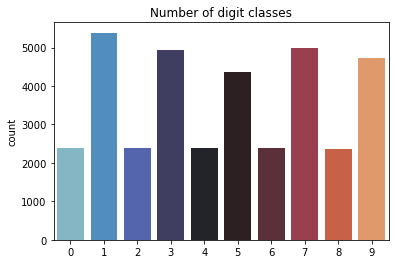

In [9]:
plt.plot(figure = (16,10))
g = sns.countplot(x=y_train_imbalanced, palette = 'icefire')
plt.title('Number of digit classes')


In [10]:
def other_class(n_classes, current_class):
    """
    Returns a list of class indices excluding the class indexed by class_ind
    :param nb_classes: number of classes in the task
    :param class_ind: the class index to be omitted
    :return: one random class that != class_ind
    """
    if current_class < 0 or current_class >= n_classes:
        error_str = "class_ind must be within the range (0, nb_classes - 1)"
        raise ValueError(error_str)

    other_class_list = list(range(n_classes))
    other_class_list.remove(current_class)
    other_class = np.random.choice(other_class_list)
    return other_class


In [11]:
def add_noise(y_train_org, noise_ratio=0, asym=False):
    """
    Get training images with specified ratio of syn/ayn label noise
    """

    y_train = np.copy(y_train_org)
    y_train_clean = np.copy(y_train)    
    # generate random noisy labels
    if noise_ratio > 0:
        if asym:
                # 1 < - 7, 2 -> 7, 3 -> 8, 5 <-> 6
                source_class = [7, 2, 3, 5, 6]
                target_class = [1, 7, 8, 6, 5]
                for s, t in zip(source_class, target_class):
                    cls_idx = np.where(y_train_clean == s)[0]
                    n_noisy = int(noise_ratio * cls_idx.shape[0] / 100)
                    noisy_sample_index = np.random.choice(cls_idx, n_noisy, replace=False)
                    y_train[noisy_sample_index] = t

        else:
            n_samples = y_train.shape[0]
            n_noisy = int(noise_ratio * n_samples / 100)
            class_index = [np.where(y_train_clean == i)[0] for i in range(10)]
            class_noisy = int(n_noisy / 10)

            noisy_idx = []
            for d in range(10):
                noisy_class_index = np.random.choice(class_index[d], class_noisy, replace=False)
                noisy_idx.extend(noisy_class_index)

            for i in noisy_idx:
                y_train[i] = other_class(n_classes=10, current_class=y_train[i])


        # print statistics
        print("Noisy label generation statistics:")
        for i in range(10):
            n_noisy = np.sum(y_train == i)
            print("Noisy class %s, has %s samples." % (i, n_noisy))
            
        print('shape: ',y_train.shape)
        return y_train


In [12]:
y_train_balanced_sym=add_noise(y_train_balanced, noise_ratio=40, asym=False)

Noisy label generation statistics:
Noisy class 0, has 5950 samples.
Noisy class 1, has 6674 samples.
Noisy class 2, has 5995 samples.
Noisy class 3, has 6123 samples.
Noisy class 4, has 5823 samples.
Noisy class 5, has 5441 samples.
Noisy class 6, has 5890 samples.
Noisy class 7, has 6220 samples.
Noisy class 8, has 5846 samples.
Noisy class 9, has 6038 samples.
shape:  (60000,)


In [13]:
y_train_imbalanced_sym=add_noise(y_train_imbalanced, noise_ratio=40, asym=False)

Noisy label generation statistics:
Noisy class 0, has 2364 samples.
Noisy class 1, has 5407 samples.
Noisy class 2, has 2362 samples.
Noisy class 3, has 4947 samples.
Noisy class 4, has 2322 samples.
Noisy class 5, has 4386 samples.
Noisy class 6, has 2409 samples.
Noisy class 7, has 5048 samples.
Noisy class 8, has 2359 samples.
Noisy class 9, has 4740 samples.
shape:  (36344,)


In [14]:
y_train_balanced_asym=add_noise(y_train_balanced, noise_ratio=40, asym=True)

Noisy label generation statistics:
Noisy class 0, has 5923 samples.
Noisy class 1, has 9248 samples.
Noisy class 2, has 3575 samples.
Noisy class 3, has 3679 samples.
Noisy class 4, has 5842 samples.
Noisy class 5, has 5620 samples.
Noisy class 6, has 5719 samples.
Noisy class 7, has 6142 samples.
Noisy class 8, has 8303 samples.
Noisy class 9, has 5949 samples.
shape:  (60000,)


In [15]:
y_train_imbalanced_asym=add_noise(y_train_imbalanced, noise_ratio=40, asym=True)

Noisy label generation statistics:
Noisy class 0, has 2385 samples.
Noisy class 1, has 7386 samples.
Noisy class 2, has 1433 samples.
Noisy class 3, has 2959 samples.
Noisy class 4, has 2384 samples.
Noisy class 5, has 3587 samples.
Noisy class 6, has 3192 samples.
Noisy class 7, has 3955 samples.
Noisy class 8, has 4325 samples.
Noisy class 9, has 4738 samples.
shape:  (36344,)


In [18]:




"""

np.save("y_train_balanced_sym", y_train_balanced_sym, allow_pickle=False)
np.save("y_train_imbalanced_sym", y_train_imbalanced_sym, allow_pickle=False)
np.save("y_train_balanced_asym", y_train_balanced_asym, allow_pickle=False)
np.save("y_train_imbalanced_asym", y_train_imbalanced_asym, allow_pickle=False)
np.save("x_train_imbalanced", x_train_imbalanced, allow_pickle=False)
np.save("y_train_imbalanced", y_train_imbalanced, allow_pickle=False)




"""



'\n\nnp.save("y_train_balanced_sym", y_train_balanced_sym, allow_pickle=False)\nnp.save("y_train_imbalanced_sym", y_train_imbalanced_sym, allow_pickle=False)\nnp.save("y_train_balanced_asym", y_train_balanced_asym, allow_pickle=False)\nnp.save("y_train_imbalanced_asym", y_train_imbalanced_asym, allow_pickle=False)\nnp.save("x_train_imbalanced", x_train_imbalanced, allow_pickle=False)\nnp.save("y_train_imbalanced", y_train_imbalanced, allow_pickle=False)\n\n\n\n\n'